<a href="https://colab.research.google.com/github/michaelbram10/Case-Study-03-Data-Mining-Market-Basket-Analysis-Ganjil-2022-Kelompok-E/blob/main/Case_Study_03_Data_Mining_Market_Basket_Analysis_Ganjil_2022_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Case 03 - Data Mining dan Business Intelligence : Market Basket Analysis Toko AlfaIndo Cabang UI Depok

**Kelompok E :**
1. Nurul Annisa                  (1906377864)
2. Athaya Yumna Fathiyah         (1906296192)
3. Michael Mario Bramanthyo Adhi (1906299534)
4. Teguh Saputra                 (1906375700)
5. Ammar Yazid                   (1906377851)        
6. Bintang Anugrah Alam          (2006571173) 
7. Salsana Siti Hatmanti         (2006571154)

## Kasus: 
- *AlfaIndo* adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Surabaya, dan Medan.
- Anda adalah seorang Data Analyst yang bekerja di kantor pusat AlfaIndo di Jakarta
- Pasca masa pandemi Toko AlfaIndo cabang UI Depok mengalami penurunan laba yang signifikan.
- Anda ditugaskan oleh pimpinan untuk membantu toko ALfaIndo cabang UI Depok untuk bangkit dari keterpurukannya.

## Petunjuk
*Catatan:*	
0-	*Warning …* Karena file berbentuk Excel anda harus menyiapkan mekanisme agar file tersebut dapat di load secara automatis ketika Jupyter Notebook and di "Run-All" oleh dosen (misal merubah ke csv dan upload ke GitHub). \
1-	Tentukan ketua kelompok, silahkan mulai fikirkan strategi pembagian kerja kelompoknya. \
2-	Semua menyiapkan Akun GitHub dan aplikasi GitHub Desktop (silahkan latihan menggunakan GitHub). \
3-	Pelajari dengan baik semua materi sebelumnya, latihan dengan data yang ada atau yang baru. \
4-	Gunakan akumulasi semua pengetahuan/skill yang telah dipelajari sebelumnya untuk menjawab kasus saat ini. \
5-	Saat membuat laporan pengolahan data case study nanti, bayangkan kalian sedang bekerja di sebuah perusahaan sebagai Data Analyst dan membuat laporan ke atasan (bukan dosen). Perhatikan dengan baik narasi/kalimat yang digunakan dalam mengambil kesimpulan dan membuat rekomendasi. \
6-	Yakinkan Code anda dapat di "Run-All" oleh dosen di Google colaboratory. \
7-	Yakinkan anda memberikan informasi/insight serta rekomendasi/strategi Non-Trivial sebanyak-banyaknya. \
8-	Yakinkan ada kesimpulan akhir (penutup) di bagian paling bawah "ipynb" anda.

## Produk
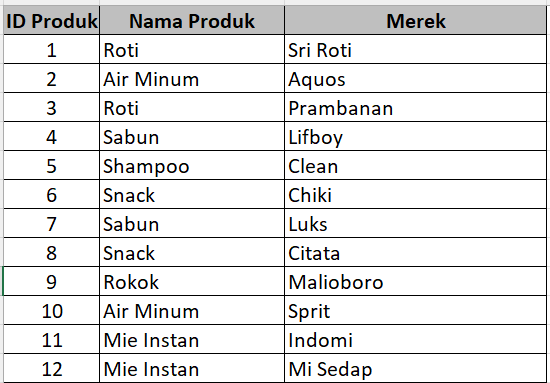

## 1. Preparation

### 1.1 Libraries and Utilities

In [ ]:
#Data Manipulatiom
import pandas as pd
import numpy as np
import sklearn
import scipy

#Visualization
import seaborn as sns           
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

#Modelling
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### 1.2 Data Loading

### Import Data

In [ ]:
# Loading Data:
df = pd.read_csv(r"https://raw.githubusercontent.com/Ammardaffala/ADM-Case-02-Clustering/main/Data%20Market%20Basket%20Analysis.csv", sep = ';', low_memory = False, encoding='utf8')

In [ ]:
df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,01/07/22 00.00,Mr. A,1,Roti,Sri Roti,2
1,1,01/07/22 00.00,Mr. A,2,Air Minum,Aquos,1
2,1,01/07/22 00.00,Mr. A,11,Mie Instan,Indomi,2
3,1,01/07/22 00.00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,01/07/22 00.00,Mr. B,2,Air Minum,Aquos,1


In [ ]:
df.tail()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
51,17,05/09/22 00.00,Mr. F,2,Air Minum,Aquos,1
52,17,05/09/22 00.00,Mr. F,4,Sabun,Lifboy,1
53,17,05/09/22 00.00,Mr. F,6,Snack,Chiki,2
54,18,02/10/22 00.00,Mr. B,1,Roti,Sri Roti,2
55,18,02/10/22 00.00,Mr. B,10,Air Minum,Sprit,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


### 1.3 Data Understanding

In [ ]:
list(df.columns)

['ID Transaksi',
 'Tanggal',
 'Konsumen',
 'ID Produk',
 'Nama Produk',
 'Merek',
 'Jumlah']

In [ ]:
df.dtypes

ID Transaksi     int64
Tanggal         object
Konsumen        object
ID Produk        int64
Nama Produk     object
Merek           object
Jumlah           int64
dtype: object

In [ ]:
### Change The Data Type of Some Columns ###

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

ParserError: ignored

In [ ]:
df['Tanggal'].value_counts()

2022-05-07    9
2022-01-07    8
2022-02-07    8
2022-04-07    6
2022-06-07    6
2022-07-07    6
2022-03-07    5
2022-05-09    4
2022-02-10    2
2022-08-07    1
2022-02-08    1
Name: Tanggal, dtype: int64

### Pengelompokkan Kolom Berdasarkan Tipe Data

In [ ]:
# melihat kolom dengan tipe data yang berbeda (number dan object)

df_number = []
df_int = []
df_float = []
df_object = []

df_number.append(df.select_dtypes('number').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_int.append(df.select_dtypes('integer').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_float.append(df.select_dtypes('float').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe number
df_object.append(df.select_dtypes('object').columns.tolist()) # menampilkan nama kolom yang berisi data dengan tipe object

print('Kolom bertipe Number (Integer/Float):\n\n',df_number,'\n')
print('Kolom bertipe Integer               :\n',df_int,'\n')
print('Kolom bertipe Float                 :\n',df_float,'\n')
print('Kolom bertipe Object                :\n\n',df_object)

Kolom bertipe Number (Integer/Float):

 [['ID Transaksi', 'ID Produk', 'Jumlah']] 

Kolom bertipe Integer               :
 [['ID Transaksi', 'ID Produk', 'Jumlah']] 

Kolom bertipe Float                 :
 [[]] 

Kolom bertipe Object                :

 [['Konsumen', 'Nama Produk', 'Merek']]


### Convert Integer to Float

In [ ]:
#Feature yang data typenya integer
df_int = df.select_dtypes(include='int').columns
print(df_int)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


In [ ]:
df[df_int] = df[df_int].astype(float)

In [ ]:
#Feature yang data typenya float
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


### Data Preprocessing

In [ ]:
# Total number of rows and columns
print("Dimensi data awal :", df.shape)
# df.shape

Dimensi data awal : (56, 7)


### Handling Missing Value

It is used to remove outliers and duplicates from the dataset. Moreover, it is a very common practice to scale the columns on a standard scale, it helps in faster convergence and gives better results.

In [ ]:
sum(df.duplicated())

0

In [ ]:
#Remove Duplicate
df.drop_duplicates(inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(56, 7)


tidak terdapat data duplikat di dalam data

### Memilih data object

In [ ]:
#Feature yang data typenya object
df_object = df.select_dtypes(include='object').columns
print(df_object)

Index(['Konsumen', 'Nama Produk', 'Merek'], dtype='object')


In [ ]:
obj = list(df_object)
df[obj].nunique()

Konsumen       11
Nama Produk     7
Merek          12
dtype: int64

### Memilih data numerik

In [ ]:
#Setelah menghapus beberapa fitur numerik
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Transaksi', 'ID Produk', 'Jumlah'], dtype='object')


### Drop Variabel yang Tidak Berguna

In [ ]:
del df['ID Transaksi']

variabel 'ID Transaksi' tidak berguna sehingga variabel 'ID Transaksi'akan dihapus

In [ ]:
#Setelah menghapus variabel
df_float = df.select_dtypes(include='float').columns
print(df_float)

Index(['ID Produk', 'Jumlah'], dtype='object')


### Cek Missing Value

In [ ]:
# Informasi Jumlah dan Persentase Missing Value

## general

df_mv = df.isnull().sum()                      # menampilkan jumlah total missing value per kolom
df_pmv = (df.isnull().sum()/len(df))*100     # menampilkan persentase missing value per kolom

df_missing = pd.concat([df_mv,df_pmv],axis = 1).reset_index() # menampilkan data dalam bentuk data frame

df_missing.columns = ['Kolom','Jumlah Missing Value','Persentase Missing Value']
missing_value = df_missing

print('Data Missing Value:\n')
print(missing_value.sample(5),'\n')
print('Persentase Missing Value Terbesar                  : ',missing_value['Persentase Missing Value'].max())
print('Persentase Missing Value Keseluruhan               : ',missing_value['Persentase Missing Value'].sum())


print('Data Duplikat:\n')
print('Jumlah terdapat data duplikat pada data df         : ',df.duplicated().sum(), '(',(df.duplicated().sum()/len(df))*100,'%',')')

Data Missing Value:

       Kolom  Jumlah Missing Value  Persentase Missing Value
5     Jumlah                     0                       0.0
0    Tanggal                     0                       0.0
1   Konsumen                     0                       0.0
2  ID Produk                     0                       0.0
4      Merek                     0                       0.0 

Persentase Missing Value Terbesar                  :  0.0
Persentase Missing Value Keseluruhan               :  0.0
Data Duplikat:

Jumlah terdapat data duplikat pada data df         :  0 ( 0.0 % )


Pada data tidak terdapat data yang duplikat sehingga tidak perlu dilakukan penghapusan data duplikat

In [ ]:
print('Jumlah Data Missing Value:\n')
print(df.isnull().sum())

Jumlah Data Missing Value:

Tanggal        0
Konsumen       0
ID Produk      0
Nama Produk    0
Merek          0
Jumlah         0
dtype: int64


## Hasil data setelah di cleansing

In [ ]:
df.head()

,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,2022-01-07,Mr. A,1.0,Roti,Sri Roti,2.0
1,2022-01-07,Mr. A,2.0,Air Minum,Aquos,1.0
2,2022-01-07,Mr. A,11.0,Mie Instan,Indomi,2.0
3,2022-01-07,Mr. A,12.0,Mie Instan,Mi Sedap,1.0
4,2022-01-07,Mr. B,2.0,Air Minum,Aquos,1.0


## Statistika Deskriptif

In [ ]:
### Summary Statistics ###
df.describe()

,ID Produk,Jumlah
count,56.000000,56.000000
mean,6.250000,1.500000
std,3.475891,0.572078
min,1.000000,1.000000
25%,3.750000,1.000000
50%,6.000000,1.000000
75%,9.250000,2.000000
max,12.000000,3.000000


### Export Hasil Data Cleansing to csv file

In [ ]:
df.to_csv("C://Users/USER/SEMESTER 7/Data Mining/Study Case 03 - Market Basket Analysis/Data Market Basket Analysis.csv")

## Menggunakan Nilai Kuantitas yang Positif

In [ ]:
df_plus = df[df['Jumlah']>=0]
df_plus.info

Dalam dataset ini, kolom 'Jumlah' menunjukkan kepada  jumlah barang yang dibeli dalam setiap transaksi. Terkadang transaksi dibatalkan, karena ini adalah toko online. Apabila terjadi pembatalan pada transaksi tertentu, maka akan didatifikasi pada kolom 'Jumlah' sebagai nilai negatif. Karena kami melakukan Market Basket Analysis, pada dasarnya kami ingin menganalisis apa yang ada di dalam keranjang yang sebenarnya dibeli oleh pelanggan kami. Nilai negatif ini tidak termasuk. Oleh karena itu, kami tidak akan menggunakannya. Seperti yang Anda lihat pada gambar di atas, hanya ada '397924' entri yang tidak dibatalkan.

## EDA (Exploratory Data Analysis)

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
import networkx as nx
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [ ]:
transactions[:1]

### Mendapatkan daftar data transaksi

In [ ]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns))])

![image.png](attachment:image.png)

In [ ]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))
print('# of items:',len(items))
print(list(items))

In [ ]:
if 'nan' in items: items.remove('nan')
print(list(items))

In [ ]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

## One-hot encoding Data Transaksi
Untuk mengetahui apakah suatu item termasuk dalam transaksi di mana setiap kolom terdiri dari nilai TRUE dan FALSE

In [ ]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

## Metric and Pruning
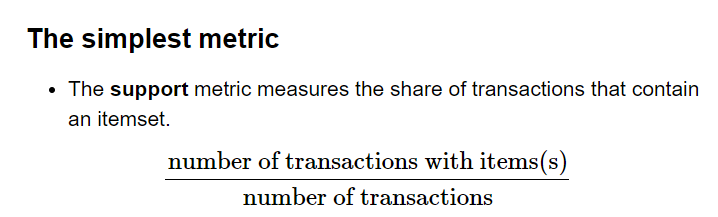

In [ ]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

In [ ]:
support.describe()

### Recommending food with support
Kita ingin membantu Toko Alfaindo ingin untuk bangkit dari keterpurukannya dan telah memutuskan untuk menggunakan Market Basket Analysis untuk mencari tahu caranya. (liat dari EDA)

In [ ]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

### Computing the support metric
Ingin memeriksa apakah aturan {air mineral} → {kentang goreng} memiliki dukungan lebih dari 0,05 .

In [ ]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

### Computing association and dissociation
Kami menggunakan metrik Zhang, yang mengukur asosiasi dan disosiasi secara terus menerus. Asosiasi adalah positif dan disosiasi adalah negatif.

In [ ]:
# Compute the support of burgers and french fries
supportT = onehot['burgers'].mean()
supportP = onehot['french fries'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

## The Apriori Algorithm
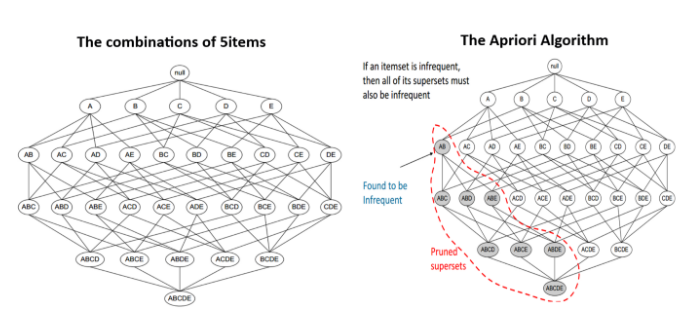

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

### Selecting a support threshold

In [ ]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

### Generating association rules
Sebelumnya kami menghitung itemset untuk Toko Alfaindo baru menggunakan algoritma Apriori. Kita memperoleh informasi untuk meningkatkan jumlah set item dari (dari data selecting suport threshold) menjadi (...). 

Tujuannya adalah untuk menentukan aturan asosiasi apa yang dapat ditambang dari kumpulan item ini

In [ ]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

In [ ]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules.info()

In [ ]:
rules.head()

## Interpretasi
Dari hasil association_rules di atas, kita dapat melihat bahwa ROSES REGENCY TEACUP AND SAUCER dan GREEN REGENCY TEACUP AND SAUCER adalah item yang memiliki asosiasi tertinggi satu sama lain karena kedua item ini memiliki nilai “lift” tertinggi. Semakin tinggi nilai lift maka semakin tinggi pula asosiasi antar item. Jika nilai lift lebih dari 1, cukup kita katakan bahwa kedua item tersebut saling terkait. Dalam hal ini, nilai lift tertinggi adalah 17,717 yang sangat tinggi. Artinya 2 item ini sangat bagus untuk dijual bersama.

Selain itu, kita juga bisa melihat nilai support ROSES REGENCY TEACUP AND SAUCER dan GREEN REGENCY TEACUP AND SAUCER adalah 0,0309% yang berarti ada 3,09% dari total transaksi bahwa 2 item ini dijual bersama. Jumlahnya adalah 476 kali.

Dari kepercayaan diri, kami bahkan dapat mengekstrak lebih banyak informasi. Ingat bahwa nilai kepercayaan dipengaruhi oleh anteseden dan konsekuen. Jika antecedent lebih tinggi dari consequent, maka rule yang akan diterapkan adalah rule nomor 1 (bukan nomor 2). dan sebaliknya. Dalam hal ini, nilai antecedent lebih tinggi dari nilai consequent. Artinya kita akan menerapkan aturan nomor 1 yaitu 𝐺𝑅𝐸𝐸𝑁 𝑇𝐸𝐴𝐶𝑈𝑃 𝐴𝑁𝐷 → 𝑅𝐸𝐺𝐸𝑁𝐶𝑌 . Dalam penjelasan yang lebih rinci, ini berarti bahwa seorang pelanggan akan cenderung membeli Cangkir dan Piring Roses Regency SETELAH mereka membeli Cangkir Teh dan Piring Green Regency. Tidak sebaliknya. Ini bisa menjadi informasi yang sangat berharga, karena kami sekarang tahu produk mana yang harus kami beri diskon. Kami dapat memberikan potongan harga untuk Roses Regency Teacup and Sauce jika pelanggan membeli Green Regency Teacup and Saucer.

### Interpretasi
Market Basket Analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari Market Basket Analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan. Kita akan menemukan pola yang menunjukkan item mana yang sering dibeli bersama sehingga  dapat diterapkan diskon ke item tertentu dengan lebih akurat. Meskipun sebuah perusahaan telah memperhatikan tingkat kepuasan customer, namun analisis ini tetap diperlukan untuk membantu perusahaan berkembang dengan lebih cepat.

Market Basket Analysis adalah suatu analisis atas perilaku konsumen secara spesifik dari suatu golongan/kelompok tertentu.  Market basket analysis umumnya dimanfaatkan sebagai titik awal pencarian pengetahuan dari suatu transaksi data ketika kita tidak mengetahui pola spesifik apa yang kita cari. 

Proses market basket analysis dimulai dengan transaksi yang terdiri dari satu/lebih penawaran produk/jasa dan beberapa informasi dasar suatu transaksi. Output dari market basket analysis adalah berbentuk aturan assosiasi (Association Rules). Yang dimaksud dengan Association Rules sendiri adalah pola-pola keterkaitan data dalam basis data.

# Terima kasih